In [1]:
import pickle
import numpy as np
import pandas as pd
import io
import scipy.stats as scs
import matplotlib.pyplot as plt
f = open("subscribers",'rb')
subscribers = pickle.load(f)
f.close()
f = open("engagement",'rb')
engagement = pickle.load(f)
f.close()
f = open("customer_service_reps",'rb')
customer_service_reps = pickle.load(f)
f.close()


In [2]:
customer_service_reps.columns

Index(['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew'],
      dtype='object')

In [3]:
customer_service_reps.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [4]:
len(customer_service_reps)

2208643

In [5]:
subscribers.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [6]:
subscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [7]:
len(subscribers)

227628

In [8]:
engagement.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period'],
      dtype='object')

In [9]:
engagement.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [10]:
len(engagement)

2585724

In [11]:
# AB Testing Trial Days 7 vs 14

In [12]:
customer_service_reps['num_trial_days'].value_counts()

14    1968089
7      160596
0       79958
Name: num_trial_days, dtype: int64

In [13]:
customer_service_reps['renew'].value_counts()

False    387666
True     218581
Name: renew, dtype: int64

In [14]:
subscribers = subscribers.merge(customer_service_reps[['subid','num_trial_days']],on=['subid'])
customer_service_reps['renew'] = customer_service_reps['renew'].astype(float)
a = customer_service_reps.dropna().groupby(['num_trial_days']).sum()
dataframe = pd.DataFrame(list(a['renew']),index=a['renew'].index, columns=['renew']).merge(subscribers['num_trial_days'].value_counts(),left_on=None, right_on=None, left_index=True, right_index=True)


In [15]:
dataframe['coversion_rate'] = dataframe['renew']/dataframe['num_trial_days']

In [16]:
dataframe.sort_values(by='coversion_rate', ascending = False)

,renew,num_trial_days,coversion_rate
14,26679.0,209804,0.127162
0,7.0,90,0.077778


In [17]:

def generate_data(N_A, N_B, p_A, p_B, days=None, control_label='A',
                  test_label='B'):


    # initiate empty container
    data = []

    # total amount of rows in the data
    N = N_A + N_B

    # distribute events based on proportion of group size
    group_bern = scs.bernoulli(N_A / (N_A + N_B))

    # initiate bernoulli distributions from which to randomly sample
    A_bern = scs.bernoulli(p_A)
    B_bern = scs.bernoulli(p_B)

    for idx in range(N):
        # initite empty row
        row = {}
        # for 'ts' column
        if days is not None:
            if type(days) == int:
                row['ts'] = idx // (N // days)
            else:
                raise ValueError("Provide an integer for the days parameter.")
        # assign group based on 50/50 probability
        row['group'] = group_bern.rvs()

        if row['group'] == 0:
            # assign conversion based on provided parameters
            row['converted'] = A_bern.rvs()
        else:
            row['converted'] = B_bern.rvs()
        # collect row into data container
        data.append(row)

    # convert data into pandas dataframe
    df = pd.DataFrame(data)

    # transform group labels of 0s and 1s to user-defined group labels
    df['group'] = df['group'].apply(
        lambda x: control_label if x == 0 else test_label)

    return df


# Hypothesis setup:

Variant B: 14 trial days

Variant A: 0 and 7 trial days

Null Hypothesis $H_{0}$: Variant B and Variant A had the same conversion rates 

Alternative hypothesis $H_{A}$: Variant B had a lower conversion rate than Variant A

# Assumptions:
1. Variant A represents the population and we can treat the population mean as known and equal to the mean of Variant A.


In [18]:

N_B = 209804 
N_A = 90
p_B = 0.127162 
p_A = 0.077778
df = generate_data(N_A, N_B, p_A, p_B, days=None, control_label='A',
                  test_label='B')
df.columns = ['Variant', 'renew'] 
df.head()

,Variant,renew
0,A,0
1,A,0
2,A,0
3,A,0
4,A,0


In [19]:
# calculate our z score
p_treatment = df[df["Variant"]=="B"]['renew'].sum()/len(df[df["Variant"]=="B"]['renew'])
p_varA = df[df["Variant"]=="A"]['renew'].sum()/len(df[df["Variant"]=="A"]['renew'])
n = len(df[df["Variant"]=="B"]['renew'])
z = (p_treatment-p_varA)/(((p_varA*(1-p_varA))/n)**0.5)
if abs(z) > 1.64:
    print("We reject the null. The conversion rate of variant B is significantly lower than that of variant A.")
    print("Our Z score is {}.".format(z))
else:
    print("Test failed. 14 trial days are not statistically different from 7&0 trial days.")
    print("Our Z score is {}.".format(z))

We reject the null. The conversion rate of variant B is significantly lower than that of variant A.
Our Z score is 2.215718325187667.


# Optimal Sample Size

In [20]:
# Calculate optumal sample size
t_alpha = 1.96
t_beta = 0.842
p0 = p_varA
p1 = p_treatment
delta = p1-p0
p_bar = (p0+p1)/2

# plug into the formula
n_star = ((t_alpha*((2*p_bar*(1-p_bar))**.5)+(t_beta*((p0*(1-p0)+p1*(1-p1))**.5)))**2)*(delta**-2)
print("The optimal sample size for each segment is {}".format(n_star))

The optimal sample size for each segment is 404.31885220513556


In [21]:
# seperate treatment and control groups
A = df[df["Variant"]=="A"]
B = df[df["Variant"]=="B"]

In [22]:
# test using 1-sample 

log = []
sample_list = []
for i in range(10):
    n = 1198

    sample_B = B.sample(n=n,replace=True)
    sample_list.append(sample_B)


    convB = sample_B['renew'].sum()/n

    z_sample = (convB-p_varA)/(((p_varA*(1-p_varA))/n)**0.5)
    if z_sample >= 1.64:
        log.append(1) # reject Null - Variant B is better 
   
    else:
        log.append(0) # fail to reject Null - Variant B is NOT better 
        
        
print("The challenger wins {}% of the time.".format(sum(log)/len(log)*100))

The challenger wins 100.0% of the time.


# Sequential Testing

Assume P(Xi=1) under H0 = p-varA and P(Xi=1) under H1 = p-treatment.

Set desired type 1 error = 5% and type 2 error = 20%.

In [23]:
# using the same sample as in part 2

# set parameters 
n = 1198
n_trials = 10
alpha = .05
beta = .2
min_diff = p_treatment-p_varA # from original dataset
upper_bound = np.log(1/alpha)
lower_bound = np.log(beta)

# test each observation in the sample:
list_of_trials = []
number_of_success = 0

for j in range(len(sample_list)):
    sample_B = sample_list[j]
    log_lambda_n = 0
    for i in range(len(sample_B)):  
        
        # update log_lambda_n
        if sample_B['renew'].iloc[i] == True:
            log_lambda_xi = np.log(p_treatment/p_varA)               
        else:
            log_lambda_xi = np.log((1-p_treatment)/(1-p_varA))

        log_lambda_n += log_lambda_xi
        
        
        # check if log_lambda_n is out of bounds
        if log_lambda_n > upper_bound: # Accept H1
            number_of_success += 1
            break 
        
        elif log_lambda_n < lower_bound: # Accept H0
            break
            
    list_of_trials.append(i+1) # record the number of iterations required to stop test 
    
print("Success rate is {}%".format(number_of_success/n_trials*100))

Success rate is 100.0%


In [24]:
# get the avg number of iterations required to stop the test
np.mean(list_of_trials)

80.1

In [25]:
# examine the list of trial number 
list_of_trials

[113, 60, 130, 60, 73, 74, 51, 50, 168, 22]

# Customer Segementation

In [26]:
df = engagement.copy()
# add other dataframe
df = pd.DataFrame.merge(df,subscribers, on = ['subid'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5676474 entries, 0 to 5676473
Data columns (total 38 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   subid                            int64         
 1   date                             datetime64[ns]
 2   app_opens                        float64       
 3   cust_service_mssgs               float64       
 4   num_videos_completed             float64       
 5   num_videos_more_than_30_seconds  float64       
 6   num_videos_rated                 float64       
 7   num_series_started               float64       
 8   payment_period                   float64       
 9   package_type                     object        
 10  num_weekly_services_utilized     float64       
 11  preferred_genre                  object        
 12  intended_use                     object        
 13  weekly_consumption_hour          float64       
 14  num_ideal_streaming_services     f

In [27]:
df['Day of Week'] = df['account_creation_date'].dt.dayofweek
df['Day of Week'] = df['Day of Week'].astype(str)
def weekday(day):
    day = int(day)
    if day in [5,6]:
        return("Weekend")
    else: return("Weekday")

In [28]:
df['Day of Week'] =df['Day of Week'].apply(weekday)
df['preferred_genre'] = df['preferred_genre'].astype(str)
df['package_type'] = df['package_type'].astype(str)
df['intended_use'] = df['intended_use'].astype(str)
df['op_sys'] = df['op_sys'].astype(str)
df['payment_type'] = df['payment_type'].astype(str)
df['op_sys'] = df['op_sys'].astype(str)

In [29]:
np.unique(df['payment_type'])

array(['Apple Pay', 'CBD', 'Najim', 'Paypal', 'RAKBANK',
       'Standard Charter', 'nan'], dtype=object)

In [30]:
df.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period',
       'package_type', 'num_weekly_services_utilized', 'preferred_genre',
       'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type', 'num_trial_days',
       'Day of Week'],
      dtype='object')

In [31]:
df = df.dropna()
id_col = df['subid']
df = df.drop(columns=['subid','date','app_opens','num_videos_more_than_30_seconds','num_series_started',
                     'payment_period','num_weekly_services_utilized','op_sys','attribution_survey',
                     'months_per_bill_period','account_creation_date','creation_until_cancel_days','trial_end_date',
                     'join_fee','cust_service_mssgs', 'num_videos_completed', 'num_videos_rated','weekly_consumption_hour', 'num_ideal_streaming_services','retarget_TF', 'attribution_technical','monthly_price', 'discount_price', 'cancel_before_trial_end','initial_credit_card_declined', 'revenue_net', 'paid_TF','refund_after_trial_TF', 'payment_type', 'Day of Week'])

In [32]:
df.columns

Index(['package_type', 'preferred_genre', 'intended_use', 'age', 'male_TF',
       'country', 'plan_type', 'language', 'num_trial_days'],
      dtype='object')

In [33]:
df.head()

,package_type,preferred_genre,intended_use,age,male_TF,country,plan_type,language,num_trial_days
3,nan,nan,expand regional access,29.0,False,UAE,base_uae_14_day_trial,ar,14
4,nan,nan,expand regional access,29.0,False,UAE,base_uae_14_day_trial,ar,14
5,nan,nan,expand regional access,29.0,False,UAE,base_uae_14_day_trial,ar,14
6,nan,nan,expand regional access,29.0,False,UAE,base_uae_14_day_trial,ar,14
7,nan,nan,expand regional access,29.0,False,UAE,base_uae_14_day_trial,ar,14


In [34]:
df_new = pd.get_dummies(df)

In [35]:
df_new.head()

,age,num_trial_days,package_type_base,package_type_economy,package_type_enhanced,package_type_nan,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_nan,...,male_TF_False,male_TF_True,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,language_ar
3,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
4,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
5,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
6,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
7,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1


In [36]:
# split data 
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_new, test_size=0.33, random_state=42)

# scale data after splitting (fit using training set)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X1 = scaler.fit_transform(train)
X2 = scaler.transform(test)

X = scaler.transform(df_new)

In [37]:
len(X1)

466155

In [38]:
len(X2)

229599

# Training Model

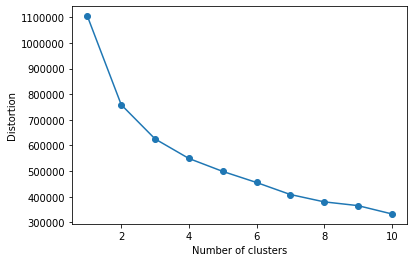

In [39]:
from sklearn.cluster import KMeans
# use the elbow method

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X1)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [40]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y1 = km.fit_predict(X1)
y2 = km.predict(X2)
y_km = km.predict(X)

In [41]:
# assign the split dataframes back to dataframe
train = pd.DataFrame(train,columns=df_new.columns)
test = pd.DataFrame(test,columns=df_new.columns)

In [42]:
# assign results back to the dataframes
train['Cluster'] = y1
test['Cluster'] = y2

In [43]:
train.groupby(by='Cluster').mean()

,age,num_trial_days,package_type_base,package_type_economy,package_type_enhanced,package_type_nan,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_nan,...,male_TF_False,male_TF_True,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,language_ar
Cluster,,,,,,,,,,,,,,,,,,,,,
0,652.283654,14,0.000163,0.000340,0.0,0.999497,0.000436,0.000000,0.000059,0.999453,...,0.910370,0.089630,1.0,0.000000,0.999571,0.000000,0.000089,0.000340,0.000000,1.0
1,130.050551,14,0.000000,0.000000,1.0,0.000000,0.660071,0.193633,0.030931,0.001607,...,0.865007,0.134993,1.0,0.000044,0.996347,0.000000,0.000088,0.003495,0.000026,1.0
2,51.784562,14,0.842728,0.156867,0.0,0.000405,0.000000,0.657499,0.102073,0.005884,...,0.870864,0.129136,1.0,0.000107,0.997272,0.000000,0.000000,0.002621,0.000000,1.0
3,67.181632,14,0.875161,0.124140,0.0,0.000699,1.000000,0.000000,0.000000,0.000000,...,0.908345,0.091655,1.0,0.000000,0.994525,0.000015,0.000000,0.005460,0.000000,1.0


In [44]:
for i in [0,1]:
    print("Cluster {} is {}%".format(i,train['Cluster'].value_counts()[i]/17092.45))

Cluster 0 is 7.909925142387428%
Cluster 1 is 6.6617132125587615%


In [45]:
for i in [0,1]:
    print("Cluster {} is {}%".format(i,test['Cluster'].value_counts()[i]/8418.68))

Cluster 0 is 7.928796438396518%
Cluster 1 is 6.63607596440297%


In [46]:
df_new['Cluster'] = y_km # predict on whole dataset

# check out the clusters - whole dataset 

df_new.groupby(by='Cluster').mean()

,age,num_trial_days,package_type_base,package_type_economy,package_type_enhanced,package_type_nan,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_nan,...,male_TF_False,male_TF_True,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,language_ar
Cluster,,,,,,,,,,,,,,,,,,,,,
0,495.323080,14,0.000178,0.000366,0.000005,0.999450,0.000446,0.000000,0.000059,0.999401,...,0.911077,0.088923,1.0,0.000000,0.999530,0.00000,0.000094,0.000376,0.000000,1.0
1,124.752215,14,0.000000,0.000000,1.000000,0.000000,0.660323,0.193169,0.030083,0.001514,...,0.864763,0.135237,1.0,0.000059,0.996406,0.00000,0.000094,0.003411,0.000029,1.0
2,51.813238,14,0.842745,0.156896,0.000000,0.000359,0.000000,0.656581,0.102271,0.005664,...,0.870464,0.129536,1.0,0.000096,0.997264,0.00000,0.000000,0.002640,0.000000,1.0
3,73.379884,14,0.874580,0.124760,0.000000,0.000659,1.000000,0.000000,0.000000,0.000000,...,0.908605,0.091395,1.0,0.000000,0.994560,0.00002,0.000000,0.005420,0.000000,1.0


In [47]:
df_new.groupby(by='Cluster').mean().to_csv('Segmentation.csv')

In [48]:
# assign ticket id back to the dataset for further visualization
df_new = pd.concat([df_new,id_col],axis=1)

In [49]:
# save the result on the whole dataset to file 
df_new.to_csv('Result.csv')

In [50]:
df_new.head()

,age,num_trial_days,package_type_base,package_type_economy,package_type_enhanced,package_type_nan,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_nan,...,country_UAE,plan_type_base_eur_14_day_trial,plan_type_base_uae_14_day_trial,plan_type_high_aud_14_day_trial,plan_type_high_sar_14_day_trial,plan_type_high_uae_14_day_trial,plan_type_low_gbp_14_day_trial,language_ar,Cluster,subid
3,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,20848497
4,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,20848497
5,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,20848497
6,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,20848497
7,29.0,14,0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,20848497


# Churn Model

In [139]:
df = customer_service_reps.copy()
# add other dataframe
df = pd.DataFrame.merge(df,subscribers, on = ['subid'])
df = pd.DataFrame.merge(df,engagement, on = ['subid'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14127146 entries, 0 to 14127145
Data columns (total 50 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   customer_service_rep_id          int64         
 1   subid                            int64         
 2   current_sub_TF                   bool          
 3   cancel_date                      datetime64[ns]
 4   account_creation_date_x          datetime64[ns]
 5   num_trial_days_x                 int64         
 6   trial_completed_TF               bool          
 7   billing_channel                  object        
 8   revenue_net_1month               float64       
 9   payment_period_x                 int64         
 10  last_payment                     datetime64[ns]
 11  next_payment                     datetime64[ns]
 12  renew                            float64       
 13  package_type                     object        
 14  num_weekly_services_utilized    

In [140]:
df.columns

Index(['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date_x', 'num_trial_days_x', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period_x',
       'last_payment', 'next_payment', 'renew', 'package_type',
       'num_weekly_services_utilized', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'num_ideal_streaming_services',
       'retarget_TF', 'age', 'male_TF', 'country', 'attribution_technical',
       'attribution_survey', 'op_sys', 'months_per_bill_period', 'plan_type',
       'monthly_price', 'discount_price', 'account_creation_date_y',
       'creation_until_cancel_days', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 'revenue_net',
       'join_fee', 'language', 'paid_TF', 'refund_after_trial_TF',
       'payment_type', 'num_trial_days_y', 'date', 'app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_s

In [141]:
df=df[['revenue_net','num_trial_days_x','payment_period_x','renew','weekly_consumption_hour','num_ideal_streaming_services','age', 'male_TF','monthly_price']]

In [142]:
df = df.dropna()

In [143]:
df.renew.value_counts()

1.0    5455462
0.0    3427022
Name: renew, dtype: int64

In [144]:
df_y=df[['renew']]

In [145]:
df=df.fillna(0)

In [146]:
df_x=df[['num_trial_days_x','payment_period_x',
         'weekly_consumption_hour','num_ideal_streaming_services','age','male_TF','revenue_net','monthly_price']]

In [147]:
df_x.columns

Index(['num_trial_days_x', 'payment_period_x', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'revenue_net',
       'monthly_price'],
      dtype='object')

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets , linear_model
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

In [149]:
X = df_x
y = df_y

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
reg = LinearRegression().fit(X_train, y_train)
reg.coef_

array([[ 2.60975203e-02, -4.01738482e-01,  1.06024877e-03,
        -1.05749012e-02, -7.22055204e-08, -6.34249585e-03,
         6.48839213e-02, -1.26458306e-01]])

In [152]:
print('intercept_:%.3f' % lr.intercept_)

intercept_:0.694


In [123]:
np.unique(y_test)

array([0., 1.])

In [153]:
y_pred=lr.predict(X_test)

In [154]:
y_true=y_test

In [155]:
print(y_pred)

[[1.06370854]
 [0.96289382]
 [0.28878065]
 ...
 [1.36139959]
 [0.65951207]
 [1.064332  ]]


In [156]:
print(y_test)

          renew
12552501    1.0
9683696     1.0
10660661    0.0
10594004    1.0
739267      0.0
...         ...
7263155     1.0
14096654    1.0
13169944    1.0
4102931     1.0
5495895     1.0

[2664746 rows x 1 columns]


In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [158]:
mean_absolute_error(y_true, y_pred)


0.28306108301015936

In [159]:
mean_squared_error(y_true, y_pred)


0.10773638612283692

In [160]:
r2_score(y_true, y_pred)

0.5453238721814869

In [161]:
y_pred = y_pred.astype(int)

In [169]:
revenue = np.array(X_test['revenue_net'])

In [170]:
revenue

array([ 9.2117, 13.7992,  3.4498, ..., 13.7625,  9.2117,  9.2117])

In [171]:
y_pred

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [172]:
expected_revenue = np.dot(y_pred.ravel(),revenue)

In [174]:
expected_revenue

5049121.187799955